**Objective :**


> The purpose of this colab is to utilize a dataset of sensor scans obtained from LiDAR (Light Detection and Ranging) data. The objective is to implement a custom version of the Iterative Closest Point (ICP) algorithm. The ICP algorithm is a widely used technique in point cloud registration, which aims to find the transformation between two point clouds by iteratively aligning corresponding points.







In [ ]:
# First of all, we need to install trimesh and open3d libraries
!pip install trimesh
!pip install open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.1/681.1 kB 28.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 130.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 110.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.1 MB/s eta 0:00:

1. **Read the zip file and the first scan**


> This is step is done so we can understand the dataset

As we can see is a zip file with 30 LiDar scans separated into 30 (0-29) folders




In [ ]:
import gdown
import zipfile
import trimesh

url = 'https://drive.google.com/uc?id=1Jg8FPCxGPckXMNSlTybxFu5unZCFuW9h'
zip_filename = 'KITTI-Sequence.zip'  # Name of the zip file to be downloaded

# Download the zip file using gdown
gdown.download(url, zip_filename)

# Opening the zip file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    #print the file names to check it
    file_list = zip_ref.namelist()
    print(file_list)

Downloading...
From: https://drive.google.com/uc?id=1Jg8FPCxGPckXMNSlTybxFu5unZCFuW9h
To: /content/KITTI-Sequence.zip
100%|██████████| 18.0M/18.0M [00:00<00:00, 26.2MB/s]

['000000/', '000000/000000_points.obj', '000001/', '000001/000001_points.obj', '000002/', '000002/000002_points.obj', '000003/', '000003/000003_points.obj', '000004/', '000004/000004_points.obj', '000005/', '000005/000005_points.obj', '000006/', '000006/000006_points.obj', '000007/', '000007/000007_points.obj', '000008/', '000008/000008_points.obj', '000009/', '000009/000009_points.obj', '000010/', '000010/000010_points.obj', '000011/', '000011/000011_points.obj', '000012/', '000012/000012_points.obj', '000013/', '000013/000013_points.obj', '000014/', '000014/000014_points.obj', '000015/', '000015/000015_points.obj', '000016/', '000016/000016_points.obj', '000017/', '000017/000017_points.obj', '000018/', '000018/000018_points.obj', '000019/', '000019/000019_points.obj', '000020/', '000020/000020_points.obj', '000021/', '000021/000021_points.obj', '000022/', '000022/000022_points.obj', '000023/', '000023/000023_points.obj', '000024/', '000024/000024_points.obj', '000025/', '000025/00002

In [ ]:
import io
import open3d as o3d
obj_filename = '000000/000000_points.obj'

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    # Read the obj file from the zip
    obj_file = zip_ref.read(obj_filename)

# Create a file-like object from the obj file data
obj_file_io = io.BytesIO(obj_file)

# Load the obj file and access its vertices
point_cloud = trimesh.load(obj_file_io, file_type='obj').vertices

print(point_cloud)
print(point_cloud.shape)

#geom = o3d.geometry.PointCloud()
#geom.points = o3d.utility.Vector3dVector(point_cloud)
#o3d.visualization.draw_geometries([geom])

[[-9.110238 18.638599  0.909355]
 [-9.151207 18.5732    0.908344]
 [-9.206173 18.536804  0.908331]
 ...
 [ 1.438176  3.840138 -1.773556]
 [ 1.419202  3.825716 -1.76457 ]
 [ 1.507196  4.092375 -1.895561]]
(62553, 3)


2. **Finally, after understanding the dataset we can download it all and store all the scans (point clouds) vertices into the scan_points array**

In [ ]:
import gdown
import zipfile
import trimesh
import io

url = 'https://drive.google.com/uc?id=1Jg8FPCxGPckXMNSlTybxFu5unZCFuW9h'
zip_filename = 'KITTI-Sequence.zip'  # Name of the zip file to be downloaded

# Download the zip file using gdown
gdown.download(url, zip_filename)
scan_points = []
for i in range(30):
    obj_filename = f'{i:06d}/{i:06d}_points.obj'  # Construct the file name
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        # Read the obj file from the zip
        obj_file = zip_ref.read(obj_filename)

    # Create a file-like object from the obj file data
    obj_file_io = io.BytesIO(obj_file)

    # Load the obj file and access its vertices
    vertices = trimesh.load(obj_file_io, file_type='obj').vertices
    scan_points.append(vertices)


Downloading...
From: https://drive.google.com/uc?id=1Jg8FPCxGPckXMNSlTybxFu5unZCFuW9h
To: /content/KITTI-Sequence.zip
100%|██████████| 18.0M/18.0M [00:00<00:00, 183MB/s]


**3. Now we are going to use the ICP algorithm to find the path the scans should take, the ICP algorithm is explained as follows:**

**ICP - Iterative Closest Neighbor**

  1 - Initialize the transformation matrix. Tranformation matrix format:

| R11  R12  R13  P1 |

| R21  R22  R23  P2 |

| R31  R32  R33  P3 |

|  0    0    0    1 |

Rij -> rotation indexes of rotation matrix

Pi -> coordinate indexes of coordinate matrix in relation to the space


  2 - Repeat until convergence

  * a. Find Nearest Neighbor in the second scan for each point in the first scan.

  Will use a cKDTree algorithm because the shape of the scans is not the same.

  * b. compute rotation matrix using SVD and then apply to the first scan set of points

  * c. allign the centroids of the matched point pairs, updating the translation matrix

  Will do this translating the centroids

  * d. update the transformation matrix after rotation and translation

  * e. apply transformation to the input points



3 - Return the transformation matrix


In [ ]:
import numpy as np
from scipy.spatial import cKDTree

def ICP(scan_points_in, scan_points_out, max_iterations=100000, convergence_boundary=0.001):
    """
    def -> Main ICP function, executes the ICP algorithm for 2 set of cloud points
    returns the transformation matrix for this pair
    """

    #1. Transformation matrix can be initialized as an identity matrix
    transformation_matrix = np.eye(4)
    original_points_in = scan_points_in.copy()

    #2. Repeat until convergence or maximum number of iterations
    for i in range(max_iterations):
        #2.a - Find nearest neighbors
        nearest_points_in, nearest_points_out = find_nearest_neighbors(scan_points_in, scan_points_out)

        previous_transformation = transformation_matrix.copy()

        #2.b -  Calculate rotation matrix
        rotation_matrix = calculate_rotation_matrix(nearest_points_in, nearest_points_out)
        # Update transformation matrix with rotation
        transformation_matrix = update_transformation_matrix_rotation(transformation_matrix, rotation_matrix)

        #2.c - Calculate translation
        translation_matrix = calculate_translation(nearest_points_in, nearest_points_out, rotation_matrix)

        #2.d - Update transformation matrix after translation and rotation
        transformation_matrix = update_transformation_matrix_translation(transformation_matrix, translation_matrix)

        #2.e -Apply transformation to input points
        scan_points_in = apply_transformation(original_points_in, transformation_matrix)

        if check_convergence(transformation_matrix, previous_transformation, convergence_boundary):
            break

    return transformation_matrix

def calculate_rotation_matrix(nearest_points_in, nearest_points_out):
    """
    def -> calculate and returns the rotation matrix using SVD and the orthogonal Procrustes problem
    """

    #calculate the in and out centroids
    in_centroid = np.mean(nearest_points_in, axis=0)
    out_centroid = np.mean(nearest_points_out, axis=0)

    #Calculate the cross variance matrix to understand the correlation
    crossvariance_matrix = np.dot((nearest_points_in - in_centroid).T, nearest_points_out - out_centroid)

    #Perform SVD to get the left singular vectors(U) and right singular vectors(Vt)
    U, e, Vt = np.linalg.svd(crossvariance_matrix)

    #calculate the rotation matrix
    R = np.dot(Vt.T, U.T)

    #check if the determinant is negative, it must preserve the orientation of the points, so it can't be.
    if np.linalg.det(R) < 0:
        Vt[-1,:] *= -1
        R = np.dot(Vt.T, U.T)

    return R

def calculate_translation(nearest_points_in, nearest_points_out, R):
    """
    def -> calculate and returns the translation matrix
    """
    #To calculate the translation, we simply take the centroids of the nearest points in and out
    #The centroids are calculated by calculatinjg the mean of each dimension (x,y,z) i.e axis=0
    in_centroid = np.mean(nearest_points_in, axis=0)
    out_centroid = np.mean(nearest_points_out, axis=0)

    #Rotate the in centroid with the rotation matrix R so we can allign the centroid with the origin
    alligned_in = np.dot(R, in_centroid)
    #Then it calculates the difference between in and the oui centroid
    t = out_centroid - alligned_in

    return t

def update_transformation_matrix_rotation(transformation_matrix, R):
    """
    def -> updates the transformation matrix with the rotation, returns the transformation matrix
    """
    #the first 3 rows of the first 3 columns of the transformation matrix are the rotation matrix
    transformation_matrix[:3, :3] = R
    return transformation_matrix

def update_transformation_matrix_translation(transformation_matrix, t):

    """
    def -> updates the transformation matrix with the translation, returns the transformation matrix
    """
    #the first 3 lines of the the last columns is the translation matrix
    transformation_matrix[:3, 3] = t
    return transformation_matrix



def initialize_transformation_matrix(source_points, target_points):
    source_centroid = np.mean(source_points, axis=0)
    target_centroid = np.mean(target_points, axis=0)

    translation = target_centroid - source_centroid
    transformation_matrix = np.eye(4)
    transformation_matrix[:3, 3] = translation

    return transformation_matrix




def find_nearest_neighbors(scan_points_in, scan_points_out):
    """
    def -> finds the nearest neighbors of the in points, returns the in points and the nearest out points
    """

    #Will use cKDTree that is a form of an Binary Seach Tree extended to higher dimensions
    #Its faster than most of the other algorithms for this case

    #construct a KD Tree from the out points
    tree = cKDTree(scan_points_out)

    #finds the indexes and the distances of the nearest neighbor for each point in the scan in points
    distances, indices = tree.query(scan_points_in)
    #print(distances)

    #uses the indexes to get the corresponding nearest point for each out point
    nearest_points_out = scan_points_out[indices]
    return scan_points_in, nearest_points_out



def apply_transformation(points, transformation_matrix):
    """
    def -> apply the transformation matrix to the in points, return this modified points.
    """
    #first expand the dimension of the in points to make it in the same dimension as the transformation matrix
    points4thcol =  np.ones((points.shape[0], 1)) #creates a 4th column
    points = np.hstack((points,points4thcol)) #stack this columns in the points matrix

    #finally apply the transformation matrix to the points by multiplying it
    transformed_points = np.dot(transformation_matrix, points.T).T

    #Return the transformed points removing the extra dimension
    return transformed_points[:, :3]

def check_convergence(transformation_matrix, previous_transformation, convergence_boundary):
    """
    def -> check the distance between the transformation matrix and the previous itration transformation matrix.
    returns an bools that indicate if the threshold is reached
    """

    #calculate the change between the transformation matrix and previous iteration trans matrix using Frobenius norm
    matrix_change = np.linalg.norm(transformation_matrix - previous_transformation)

    #return the condition, if it is bigger os lesser than the thrsehold
    return matrix_change <= convergence_boundary


matrixes = np.zeros((30, 4, 4))


print("Transformation Matrixes")
for i in range(len(scan_points)-1):
  print("Transformation matrix for = " + str(i) + " to " + str(i+1))
  matrixes[i] = ICP(scan_points[i],scan_points[i+1])
  print(matrixes[i])

print("\n done")



Transformation Matrixes
Transformation matrix for = 0 to 1
[[ 9.99999870e-01  3.04412959e-04 -4.10254060e-04 -1.80109791e-03]
 [-3.04565622e-04  9.99999884e-01 -3.72106946e-04 -2.36869090e-02]
 [ 4.10140739e-04  3.72231847e-04  9.99999847e-01 -5.35388477e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transformation matrix for = 1 to 2
[[ 9.99999968e-01  4.28653624e-06  2.54277877e-04  9.72662025e-03]
 [-4.19826500e-06  9.99999940e-01 -3.47144344e-04 -3.24606812e-02]
 [-2.54279350e-04  3.47143265e-04  9.99999907e-01 -2.55191576e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transformation matrix for = 2 to 3
[[ 9.99999914e-01  3.86630486e-04  1.47428340e-04  4.68129487e-03]
 [-3.86592466e-04  9.99999892e-01 -2.57833189e-04 -3.61341326e-02]
 [-1.47528011e-04  2.57776172e-04  9.99999956e-01 -1.94214264e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transformation matrix for = 3 to 4
[[ 9.99999694e-01  7.73862591

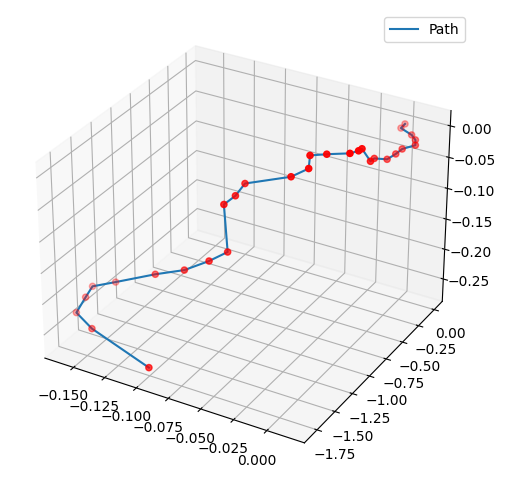

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def track_path(scan_points_list):

    #Initial position
    current_position = np.zeros(4)
    current_position[3] = 1
    path = [current_position]

    #Iterate over the set apllying ICP in sequence
    for i in range(len(scan_points_list) - 1):
        scan_points_in = scan_points_list[i]
        scan_points_out = scan_points_list[i + 1]

        transformation_matrix = ICP(scan_points_in, scan_points_out)

        #multiply the point by the current transformation_matrix to transform it correctly with the current position
        current_position = np.dot(transformation_matrix, current_position)

        path.append(current_position)

    path = np.array(path)

    return path

def plot_path(path):

    # Take all the translation values
    xs = path[:, 0]
    ys = path[:, 1]
    zs = path[:, 2]

    #Plot

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(xs, ys, zs, label='Path')
    ax.scatter(xs, ys, zs, c='red')
    ax.legend()

    plt.show()



# Calcular o caminho
path = track_path(scan_points)

# Plotar o caminho
plot_path(path)


**Now we are going to test with the python open3d library**

In [ ]:
import gdown
import zipfile
import trimesh
import io
import open3d as o3d
import numpy as np
matrixes = np.zeros((30, 4, 4))
# Convert scan_points_in[0] and scan_points_in[1] to numpy arrays
for i in range(len(scan_points)-1):
  source_points = np.array(scan_points[i])
  target_points = np.array(scan_points[i+1])

  # Create point cloud objects from the numpy arrays
  source_cloud = o3d.geometry.PointCloud()
  source_cloud.points = o3d.utility.Vector3dVector(source_points)

  target_cloud = o3d.geometry.PointCloud()
  target_cloud.points = o3d.utility.Vector3dVector(target_points)

  # Perform ICP
  trans_init = np.eye(4)  # Initial transformation matrix as identity

  # Run ICP registration
  reg_p2p = o3d.pipelines.registration.registration_icp(
      source_cloud, target_cloud, max_correspondence_distance=0.001, init=trans_init)

  # Obtain the aligned point cloud after registration
  aligned_source_cloud = source_cloud.transform(reg_p2p.transformation)

  # Obtain the nearest point correspondences
  correspondences = reg_p2p.correspondence_set
  print(source_cloud)
  #nearest_points_target = np.asarray(target_cloud.points)[correspondences[:, 1]]

  # Print the transformation matrix
  print("Transformation Matrix:")
  print(reg_p2p.transformation)
  matrixes[i] = reg_p2p.transformation







PointCloud with 62553 points.
Transformation Matrix:
[[ 1.00000000e+00  1.66055829e-06 -3.56070011e-08 -3.44779818e-05]
 [-1.66055829e-06  1.00000000e+00  9.98225624e-08  2.38965859e-06]
 [ 3.56071669e-08 -9.98225033e-08  1.00000000e+00  5.09873535e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
PointCloud with 62340 points.
Transformation Matrix:
[[ 1.00000000e+00 -7.07996994e-06  1.90058450e-05  2.52921896e-05]
 [ 7.07991012e-06  1.00000000e+00  3.14722373e-06  1.81117775e-05]
 [-1.90058673e-05 -3.14708917e-06  1.00000000e+00 -6.05518879e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
PointCloud with 62138 points.
Transformation Matrix:
[[ 1.00000000e+00 -4.20715383e-06  1.66710114e-05  1.40315159e-05]
 [ 4.20717057e-06  1.00000000e+00 -1.00446766e-06  8.61949928e-07]
 [-1.66710072e-05  1.00453780e-06  1.00000000e+00 -1.47293523e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
PointCloud with 61833 points.
Tran

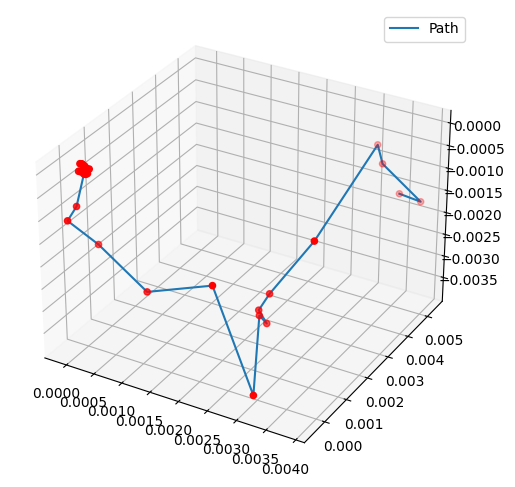

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import open3d as o3d

def track_path(scan_points_list):
    current_position = np.zeros(4)
    current_position[3] = 1
    path = [current_position]

    for i in range(len(scan_points_list) - 1):
        scan_points_in = scan_points_list[i]
        scan_points_out = scan_points_list[i + 1]

        # Create PointCloud objects from the numpy arrays
        source_cloud = o3d.geometry.PointCloud()
        source_cloud.points = o3d.utility.Vector3dVector(scan_points_in)

        target_cloud = o3d.geometry.PointCloud()
        target_cloud.points = o3d.utility.Vector3dVector(scan_points_out)

        # Run ICP registration
        reg_p2p = o3d.pipelines.registration.registration_icp(
            source_cloud, target_cloud, max_correspondence_distance=0.001)

        transformation_matrix = reg_p2p.transformation
        current_position = np.dot(transformation_matrix, current_position)
        path.append(current_position)

    path = np.array(path)
    return path

def plot_path(path):
    xs = path[:, 0]
    ys = path[:, 1]
    zs = path[:, 2]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(xs, ys, zs, label='Path')
    ax.scatter(xs, ys, zs, c='red')
    ax.legend()

    plt.show()


# Calculate the path
path = track_path(scan_points)

# Plot the path
plot_path(path)


Downloading...
From: https://drive.google.com/uc?id=10rYRFQAi1AlJDSWAoZK7-SX0D8Kr2oDM
To: /content/ground_truth.npy
100%|██████████| 3.97k/3.97k [00:00<00:00, 10.6MB/s]

[[[ 1.000000e+00  9.043680e-12  2.326809e-11  5.551115e-17]
  [ 9.043683e-12  1.000000e+00  2.392370e-10  3.330669e-16]
  [ 2.326810e-11  2.392370e-10  9.999999e-01 -4.440892e-16]
  [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]

 [[ 9.999978e-01  5.272628e-04 -2.066935e-03 -4.690294e-02]
  [-5.296506e-04  9.999992e-01 -1.154865e-03 -2.839928e-02]
  [ 2.066324e-03  1.155958e-03  9.999971e-01  8.586941e-01]
  [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]

 [[ 9.999910e-01  1.048972e-03 -4.131348e-03 -9.374345e-02]
  [-1.058514e-03  9.999968e-01 -2.308104e-03 -5.676064e-02]
  [ 4.128913e-03  2.312456e-03  9.999887e-01  1.716275e+00]
  [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]

 [[ 9.999796e-01  1.566466e-03 -6.198571e-03 -1.406429e-01]
  [-1.587952e-03  9.999927e-01 -3.462706e-03 -8.515762e-02]
  [ 6.193102e-03  3.472479e-03  9.999747e-01  2.574964e+00]
  [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]

 [[ 9.999637e-01  2.078471e-03 -

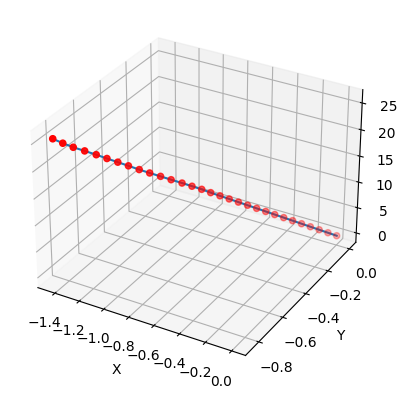

In [ ]:
#Ground truth provided

url = 'https://drive.google.com/uc?id=10rYRFQAi1AlJDSWAoZK7-SX0D8Kr2oDM'
filename = 'ground_truth.npy'

# Download the .npy file
gdown.download(url, filename, quiet=False)

# Load the .npy file
data = np.load(filename)
matrixes = data
print(matrixes)

xs = matrixes[:, 0, 3]
ys = matrixes[:, 1, 3]
zs = matrixes[:, 2, 3]

#Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, ys, zs, label='Path')
ax.scatter(xs, ys, zs, c='red')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


plt.show()



**Conclusion**

Although the implementation and the ground truth are not the same, there some similarity between the results.

The differences may come from different factors, such as different nearest neighbor finding methods, varying hyperparameters, SVD algorithm differences, and convergence criteria discrepancies. Despite these differences, the similarities indicate that both implementations are converging towards a reasonable alignment. To further enhance the alignment results,  the fine-tuning of the hyperparameters can be explored, also experimenting with alternative nearest neighbor search methods, and considering different SVD algorithms or robust estimation techniques.

**References**
* Iterative Closest Point (ICP) - 5 Minutes with Cyrill - https://www.youtube.com/watch?v=QWDM4cFdKrE

* Modern Robotics, chapter 3 - Northwestern Robotics

* The ICP algorithm - https://eng.libretexts.org/Bookshelves/Mechanical_Engineering/Introduction_to_Autonomous_Robots_(Correll)/12%3A__RGB-D_SLAM/12.02%3A_The_Iterative_Closest_Point_(ICP)_Algorithm

* Many github and stackoverflow pages
